<a href="https://colab.research.google.com/github/JozefV99/Master-Thesis/blob/main/Datasets/MEDIUM_COMPLEXITY_DATASET_PREPARATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT IMAGES FROM GOOGLE DRIVE:**

In [1]:
# IMPORT:

import os
import shutil
import zipfile
import random
from collections import defaultdict
from google.colab import drive
from PIL import Image

# Mount Google Drive
drive.mount('/content/gdrive')

def extract_and_organize(source_folder, target_folder):
    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    for zip_filename in os.listdir(source_folder):
        if zip_filename.endswith('.zip'):
            zip_path = os.path.join(source_folder, zip_filename)
            with zipfile.ZipFile(zip_path, 'r') as zip_file:
                # Extract the zip file into a temporary directory
                temp_dir = os.path.join(target_folder, "temp")
                os.makedirs(temp_dir, exist_ok=True)
                zip_file.extractall(temp_dir)
                print(f"Extracted {zip_filename} into {temp_dir}")

                # Check the actual directory structure within the temp directory
                intermediate_dir = temp_dir
                possible_dirs = [intermediate_dir] + [os.path.join(intermediate_dir, d) for d in os.listdir(intermediate_dir) if os.path.isdir(os.path.join(intermediate_dir, d))]
                for dir_path in possible_dirs:
                    if os.path.exists(dir_path):
                        for file_name in os.listdir(dir_path):
                            full_file_path = os.path.join(dir_path, file_name)
                            if os.path.isfile(full_file_path):
                                # Resize the image
                                label = file_name[:8]  # Extract label (first 8 characters)
                                label_dir = os.path.join(target_folder, label)
                                os.makedirs(label_dir, exist_ok=True)
                                shutil.move(full_file_path, os.path.join(label_dir, file_name))
                # Clean up the temporary directory
                shutil.rmtree(temp_dir)
                print(f"Cleaned up {temp_dir}")

# Specify the source and target directories
source = "/content/gdrive/My Drive/Colab Notebooks/Data/MEDIUM COMPLEXITY"
base_target = '/content/Images'
target_folder = '/content/Images/all_images'

# Extract and organize files from ZIP archives
extract_and_organize(source, base_target)

# Delete folders
# Delete previous directories along with any files
folder_paths = [
    "/content/Images/D1098590",
    "/content/Images/D1100844",
    "/content/Images/D1612695",
    "/content/Images/D1899542",
    "/content/Images/D4332268"
]

# Ensure the target directory exists
os.makedirs(target_folder, exist_ok=True)

# Loop through each folder path
for folder in folder_paths:
    # List all files in the current directory
    files = os.listdir(folder)
    for file in files:
        # Construct full file path
        file_path = os.path.join(folder, file)
        # Move only image files to the target folder
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            shutil.move(file_path, os.path.join(target_folder, file))

print("All images have been moved to", target_folder)

# Print final directory structure for verification
for root, dirs, files in os.walk(target_folder, topdown=True):
    for dir_name in dirs:
        print(f"Directory: {os.path.join(root, dir_name)}")
        if os.listdir(os.path.join(root, dir_name)):
            print(os.listdir(os.path.join(root, dir_name)))

# Loop through each folder and delete it
for folder in folder_paths:
    shutil.rmtree(folder)

Mounted at /content/gdrive
Extracted D1098590.zip into /content/Images/temp
Cleaned up /content/Images/temp
Extracted D1100844.zip into /content/Images/temp
Cleaned up /content/Images/temp
Extracted D1612695.zip into /content/Images/temp
Cleaned up /content/Images/temp
Extracted D1899542.zip into /content/Images/temp
Cleaned up /content/Images/temp
Extracted D4332268.zip into /content/Images/temp
Cleaned up /content/Images/temp
All images have been moved to /content/Images/all_images


# **IMPORT ANNOTATIONS FROM GOOGLE DRIVE:**

In [2]:
# IMPORT ANNOTATIONS

import os
import shutil
from google.colab import drive

# Mount Google Drive
#drive.mount('/content/gdrive')

# Define the source directory on Google Drive and the target directory on Colab
source_directory = "/content/gdrive/My Drive/Colab Notebooks/Data/MEDIUM COMPLEXITY/Annotations" # Change to your Google Drive source folder
target_directory = '/content/Images'  # Change to your target folder on Colab

# Ensure the target directory exists
os.makedirs(target_directory, exist_ok=True)

# Copy files from the source directory to the target directory
for filename in os.listdir(source_directory):
    source_file = os.path.join(source_directory, filename)
    target_file = os.path.join(target_directory, filename)
    # Copy each file to the target directory
    shutil.copy(source_file, target_file)
    print(f"Copied {filename} to {target_directory}")

Copied MEDIUM_COMPLEXITY_Annotations.zip to /content/Images


In [3]:
# UNZIP:

import zipfile
import os

# Specify the path to the zip file
zip_file_path = '/content/Images/MEDIUM_COMPLEXITY_Annotations.zip'

# Specify the target directory to extract the contents
target_directory = '/content/Images'

# Ensure the target directory exists
os.makedirs(target_directory, exist_ok=True)

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents into the target directory
    zip_ref.extractall(target_directory)

print(f"Files have been extracted to {target_directory}")

Files have been extracted to /content/Images


## **MERGE IMAGES AND ANNOTATIONS TOGETHER:**

In [4]:
import os
import shutil

def merge_folders(src_folder1, src_folder2, dest_folder):
    # Ensure the destination folder exists, if not, create it
    os.makedirs(dest_folder, exist_ok=True)

    # Function to copy contents from source to destination
    def copy_contents(src_folder, dest_folder):
        for item in os.listdir(src_folder):
            src_path = os.path.join(src_folder, item)
            dest_path = os.path.join(dest_folder, item)

            if os.path.isdir(src_path):
                # If it's a directory, recursively copy its contents
                shutil.copytree(src_path, dest_path, dirs_exist_ok=True)
            else:
                # If it's a file, copy it directly
                shutil.copy2(src_path, dest_path)

    # Copy contents from both source folders to the destination folder
    copy_contents(src_folder1, dest_folder)
    print(f"Copied all files from {src_folder1} to {dest_folder}")

    copy_contents(src_folder2, dest_folder)
    print(f"Copied all files from {src_folder2} to {dest_folder}")

# Example usage
src_folder1 = '/content/Images/all_images'
src_folder2 = '/content/Images/Annotations'
dest_folder = '/content/Images/all_combined'

merge_folders(src_folder1, src_folder2, dest_folder)

Copied all files from /content/Images/all_images to /content/Images/all_combined
Copied all files from /content/Images/Annotations to /content/Images/all_combined


### **CHECK WHETHER EACH PICTURE HAS A CORRESPONDING ANNOTATION:**

In [5]:
# CHECK FOR PAIRS:

import os

# Define the path to the images and annotations directories
images_folder = '/content/Images/all_images'
annotations_folder = '/content/Images/Annotations'

# Get list of image and annotation filenames
image_files = {os.path.splitext(f)[0] for f in os.listdir(images_folder) if f.endswith(('.png', '.jpg', '.jpeg'))}
annotation_files = {os.path.splitext(f)[0] for f in os.listdir(annotations_folder) if f.endswith('.txt')}

# Check for missing annotation files
missing_annotations = image_files - annotation_files
if missing_annotations:
    print(f"Missing annotations for {len(missing_annotations)} files:")
    for filename in missing_annotations:
        print(f"{filename}.jpg or .png")
else:
    print("All images have corresponding annotations.")

# Optionally, check for annotation files without corresponding images
extra_annotations = annotation_files - image_files
if extra_annotations:
    print(f"Extra annotation files found for {len(extra_annotations)} images that do not exist:")
    for filename in extra_annotations:
        print(f"{filename}.txt")
else:
    print("No extra annotation files found.")

All images have corresponding annotations.
No extra annotation files found.


# **CONVERT ANNOTATIONS FROM YOLO FORMAT INTO .xml**

In [6]:
# CONVERT YOLO ANNOTATIONS INTO .xml AND CHANGE CLASSES:

import os
from PIL import Image
from xml.etree.ElementTree import Element, SubElement, ElementTree

def yolo_to_voc(yolo_file_path, image_folder, output_folder):
    os.makedirs(output_folder, exist_ok=True)

    for yolo_file in os.listdir(yolo_file_path):
        image_file = yolo_file.replace('.txt', '.png')
        image_path = os.path.join(image_folder, image_file)
        image = Image.open(image_path)
        width, height = image.size

        annotation = Element('annotation')
        tree = ElementTree(annotation)

        filename = SubElement(annotation, 'filename')
        filename.text = image_file

        size = SubElement(annotation, 'size')
        width_elem = SubElement(size, 'width')
        width_elem.text = str(width)
        height_elem = SubElement(size, 'height')
        height_elem.text = str(height)
        depth_elem = SubElement(size, 'depth')
        depth_elem.text = '3'  # Assuming RGB images

        with open(os.path.join(yolo_file_path, yolo_file), 'r') as file:
            for line in file.readlines():
                parts = line.strip().split()
                class_id = int(parts[0])  # Convert class_id to integer directly
                center_x, center_y, bbox_width, bbox_height = map(float, parts[1:])  # Convert only the coordinates to float

                x_min = (center_x - bbox_width / 2) * width
                y_min = (center_y - bbox_height / 2) * height
                x_max = (center_x + bbox_width / 2) * width
                y_max = (center_y + bbox_height / 2) * height

                object_elem = SubElement(annotation, 'object')
                name = SubElement(object_elem, 'name')
                name.text = str(class_id + 1)  # Increment class_id by 1
                bndbox = SubElement(object_elem, 'bndbox')
                xmin = SubElement(bndbox, 'xmin')
                xmin.text = str(int(x_min))
                ymin = SubElement(bndbox, 'ymin')
                ymin.text = str(int(y_min))
                xmax = SubElement(bndbox, 'xmax')
                xmax.text = str(int(x_max))
                ymax = SubElement(bndbox, 'ymax')
                ymax.text = str(int(y_max))

        tree.write(os.path.join(output_folder, yolo_file.replace('.txt', '.xml')))

# Example usage
yolo_to_voc('/content/Images/Annotations', '/content/Images/all_images', '/content/Images/XML_Annotations')

In [7]:
import os
import shutil

def merge_folders(src_folder1, src_folder2, dest_folder):
    # Ensure the destination folder exists, if not, create it
    os.makedirs(dest_folder, exist_ok=True)

    # Function to copy contents from source to destination
    def copy_contents(src_folder, dest_folder):
        for item in os.listdir(src_folder):
            src_path = os.path.join(src_folder, item)
            dest_path = os.path.join(dest_folder, item)

            if os.path.isdir(src_path):
                # If it's a directory, recursively copy its contents
                shutil.copytree(src_path, dest_path, dirs_exist_ok=True)
            else:
                # If it's a file, copy it directly
                shutil.copy2(src_path, dest_path)

    # Copy contents from both source folders to the destination folder
    copy_contents(src_folder1, dest_folder)
    print(f"Copied all files from {src_folder1} to {dest_folder}")

    copy_contents(src_folder2, dest_folder)
    print(f"Copied all files from {src_folder2} to {dest_folder}")

# Example usage
src_folder1 = '/content/Images/all_images'
src_folder2 = '/content/Images/XML_Annotations'
dest_folder = '/content/Images/all_combined_XML'

merge_folders(src_folder1, src_folder2, dest_folder)

Copied all files from /content/Images/all_images to /content/Images/all_combined_XML
Copied all files from /content/Images/XML_Annotations to /content/Images/all_combined_XML


# **SPLIT INTO TRAINING AND VALIDATION:**

### **SPLIT FOR YOLO:**

In [8]:
import os
import shutil
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image

# Paths for the dataset and destination folders
dataset_path = '/content/Images/all_combined'  # Update this path
train_dir = '/content/Images/training'  # Destination path for training data
val_dir = '/content/Images/validation'  # Destination path for validation data

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

def extract_label(filename):
    # Example label extraction, adjust if your labels are structured differently
    # Assumes the label is part of the filename before an underscore or other delimiter
    return filename.split('_')[0]

def normalize_and_save(file_path, save_path):
    # Open the image file
    img = Image.open(file_path)
    img = img.convert('RGB')  # Convert to RGB if not already

    # Normalize pixel values to [0, 1]
    np_img = np.array(img) / 255.0

    # Save the normalized image
    norm_img = Image.fromarray((np_img * 255).astype('uint8'))
    norm_img.save(save_path)

# Collect all image files and filter those with a corresponding annotation file
file_paths = [os.path.join(dataset_path, f) for f in os.listdir(dataset_path) if f.endswith('.png')]
labels = [extract_label(f) for f in file_paths]

# Ensure corresponding .txt files for annotations exist
file_paths = [f for f in file_paths if os.path.exists(f"{f[:-4]}.txt")]
labels = [labels[i] for i in range(len(file_paths)) if os.path.exists(f"{file_paths[i][:-4]}.txt")]

# Perform Stratified Split:
train_files, val_files, train_labels, val_labels = train_test_split(
    file_paths, labels, test_size=0.2, stratify=labels, random_state=42)

# Copy and Normalize Files to Their Directories:
def copy_and_prepare_files(files, target_dir):
    for file_path in files:
        base_name = os.path.basename(file_path)
        image_target_path = os.path.join(target_dir, base_name)
        label_target_path = os.path.join(target_dir, base_name.replace('.png', '.txt'))

        # Copy and normalize image
        normalize_and_save(file_path, image_target_path)

        # Copy label
        shutil.copy(file_path.replace('.png', '.txt'), label_target_path)

# Copy training and validation files
copy_and_prepare_files(train_files, train_dir)
copy_and_prepare_files(val_files, val_dir)

# Output Summary:
print("Training and validation datasets prepared.")
print(f"Training images and labels copied to: {train_dir}")
print(f"Validation images and labels copied to: {val_dir}")

Training and validation datasets prepared.
Training images and labels copied to: /content/Images/training
Validation images and labels copied to: /content/Images/validation


### **SPLIT FOR XML:**

In [9]:
import os
import shutil
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image

# Paths for the dataset and destination folders
dataset_path = '/content/Images/all_combined_XML'  # Update this path
train_dir = '/content/Images/training_XML'  # Destination path for training data
val_dir = '/content/Images/validation_XML'  # Destination path for validation data

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

def extract_label(filename):
    # Example label extraction, adjust if your labels are structured differently
    # Assumes the label is part of the filename before an underscore or other delimiter
    return filename.split('_')[0]

def normalize_and_save(file_path, save_path):
    # Open the image file
    img = Image.open(file_path)
    img = img.convert('RGB')  # Convert to RGB if not already

    # Normalize pixel values to [0, 1]
    np_img = np.array(img) / 255.0

    # Save the normalized image
    norm_img = Image.fromarray((np_img * 255).astype('uint8'))
    norm_img.save(save_path)

# Collect all image files and filter those with a corresponding annotation file
file_paths = [os.path.join(dataset_path, f) for f in os.listdir(dataset_path) if f.endswith('.png')]
labels = [extract_label(f) for f in file_paths]

# Ensure corresponding .txt files for annotations exist
file_paths = [f for f in file_paths if os.path.exists(f"{f[:-4]}.xml")]
labels = [labels[i] for i in range(len(file_paths)) if os.path.exists(f"{file_paths[i][:-4]}.xml")]

# Perform Stratified Split:
train_files, val_files, train_labels, val_labels = train_test_split(
    file_paths, labels, test_size=0.2, stratify=labels, random_state=42)

# Copy and Normalize Files to Their Directories:
def copy_and_prepare_files(files, target_dir):
    for file_path in files:
        base_name = os.path.basename(file_path)
        image_target_path = os.path.join(target_dir, base_name)
        label_target_path = os.path.join(target_dir, base_name.replace('.png', '.xml'))

        # Copy and normalize image
        normalize_and_save(file_path, image_target_path)

        # Copy label
        shutil.copy(file_path.replace('.png', '.xml'), label_target_path)

# Copy training and validation files
copy_and_prepare_files(train_files, train_dir)
copy_and_prepare_files(val_files, val_dir)

# Output Summary:
print("Training and validation datasets prepared.")
print(f"Training images and labels copied to: {train_dir}")
print(f"Validation images and labels copied to: {val_dir}")

Training and validation datasets prepared.
Training images and labels copied to: /content/Images/training_XML
Validation images and labels copied to: /content/Images/validation_XML


In [10]:
# COUNT NUMBER OF FILES:

import os

def count_files_in_folder(folder_path):
    """
    Count all items, number of image files, and number of text files in the specified folder.

    Parameters:
    - folder_path: str. Path to the folder whose contents are to be counted.
    """
    total_items = 0
    image_count = 0
    text_file_count = 0
    image_extensions = ['.jpg', '.jpeg', '.png']
    text_extensions = ['.txt', '.xml']

    try:
        # List all items in the folder
        items = os.listdir(folder_path)
        total_items = len(items)

        # Count images and text files
        for item in items:
            _, ext = os.path.splitext(item)
            if ext.lower() in image_extensions:
                image_count += 1
            elif ext.lower() in text_extensions:
                text_file_count += 1

        print(f"Total number of items in '{folder_path}': {total_items}")
        print(f"Number of image files: {image_count}")
        print(f"Number of text files: {text_file_count}")

    except FileNotFoundError:
        print(f"The folder '{folder_path}' does not exist.")
    except PermissionError:
        print(f"Permission denied to access the folder '{folder_path}'.")

# Example usage
folder_path = '/content/Images/training'  # Change this to your specific folder path
count_files_in_folder(folder_path)

Total number of items in '/content/Images/training': 80000
Number of image files: 40000
Number of text files: 40000


### **CHECK FOR YOLO:**

In [11]:
# CHECK FOR PAIRS AND OVERLAP:

import os

def check_pairs_and_overlap(train_dir, val_dir):
    """
    Checks each folder to ensure every image has a corresponding annotation file and checks for overlapping images between folders.

    Args:
        train_dir (str): Directory containing training images and annotations.
        val_dir (str): Directory containing validation images and annotations.
    """
    # Gather files from training and validation directories
    train_files = os.listdir(train_dir)
    val_files = os.listdir(val_dir)

    # Filter image files and their corresponding annotation files
    train_images = {f for f in train_files if f.endswith(('.png', '.jpg', '.jpeg'))}
    val_images = {f for f in val_files if f.endswith(('.png', '.jpg', '.jpeg'))}

    # Check for missing pairs in training and validation directories
    missing_train_pairs = [img for img in train_images if os.path.splitext(img)[0] + '.txt' not in train_files]
    missing_val_pairs = [img for img in val_images if os.path.splitext(img)[0] + '.txt' not in val_files]

    # Check for overlap
    overlap = train_images.intersection(val_images)

    # Report results
    if missing_train_pairs:
        print("Training directory missing annotation files for the following images:")
        for missing in missing_train_pairs:
            print(missing)
    else:
        print("All training images have corresponding annotation files.")

    if missing_val_pairs:
        print("Validation directory missing annotation files for the following images:")
        for missing in missing_val_pairs:
            print(missing)
    else:
        print("All validation images have corresponding annotation files.")

    if overlap:
        print("Overlap found in training and validation datasets for the following images:")
        for img in overlap:
            print(img)
    else:
        print("No overlap between training and validation datasets.")

# Specify the training and validation directory paths
train_dir_path = '/content/Images/training'  # Update this path
val_dir_path = '/content/Images/validation'  # Update this path
check_pairs_and_overlap(train_dir_path, val_dir_path)

All training images have corresponding annotation files.
All validation images have corresponding annotation files.
No overlap between training and validation datasets.


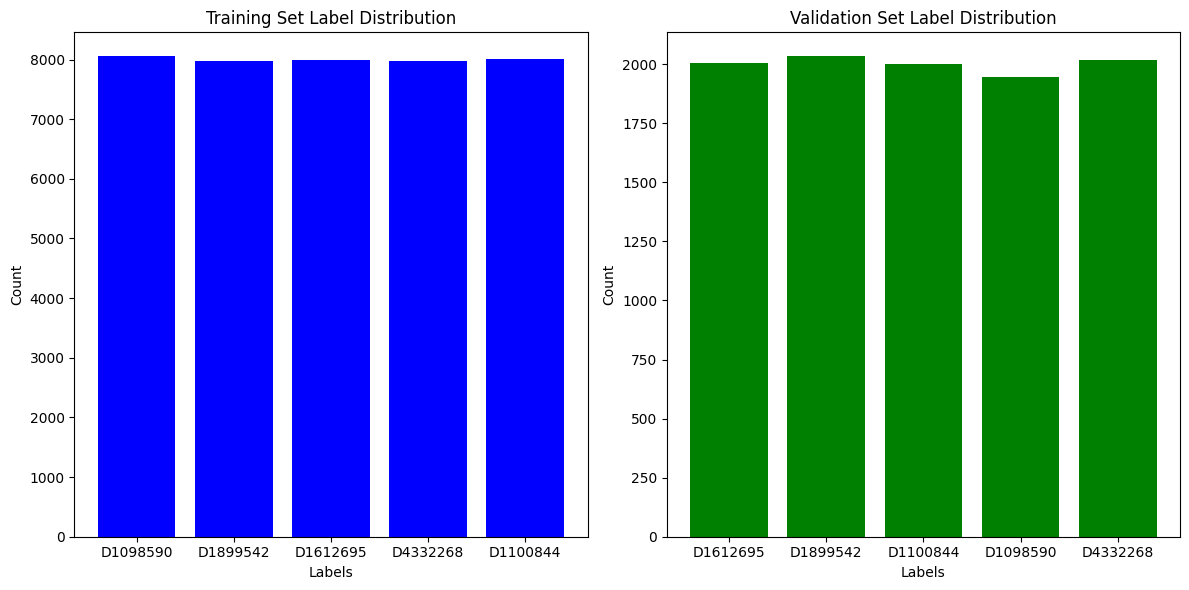

In [12]:
# CHECK FOR COMPONENT DISTRIBUTION IN THE DATASET:

import os
import matplotlib.pyplot as plt

def extract_label(filename):
    # Extracts the label from the filename. Modify this based on your actual label structure.
    return filename.split('_')[0]

# Paths to the training and validation directories
train_dir = '/content/Images/training'
val_dir = '/content/Images/validation'

# Function to count labels in a directory
def count_labels_in_directory(directory):
    labels = [extract_label(f) for f in os.listdir(directory) if f.endswith('.png')]
    label_counts = {}
    for label in labels:
        if label in label_counts:
            label_counts[label] += 1
        else:
            label_counts[label] = 1
    return label_counts

# Count labels in each set
train_counts = count_labels_in_directory(train_dir)
val_counts = count_labels_in_directory(val_dir)

# Create plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.bar(train_counts.keys(), train_counts.values(), color='blue')
ax1.set_title('Training Set Label Distribution')
ax1.set_xlabel('Labels')
ax1.set_ylabel('Count')

ax2.bar(val_counts.keys(), val_counts.values(), color='green')
ax2.set_title('Validation Set Label Distribution')
ax2.set_xlabel('Labels')
ax2.set_ylabel('Count')

# Improve layout and display plot
plt.tight_layout()
plt.show()

### **CHECK FOR XML:**

In [13]:
# CHECK FOR PAIRS AND OVERLAP:

import os

def check_pairs_and_overlap(train_dir, val_dir):
    """
    Checks each folder to ensure every image has a corresponding annotation file and checks for overlapping images between folders.

    Args:
        train_dir (str): Directory containing training images and annotations.
        val_dir (str): Directory containing validation images and annotations.
    """
    # Gather files from training and validation directories
    train_files = os.listdir(train_dir)
    val_files = os.listdir(val_dir)

    # Filter image files and their corresponding annotation files
    train_images = {f for f in train_files if f.endswith(('.png', '.jpg', '.jpeg'))}
    val_images = {f for f in val_files if f.endswith(('.png', '.jpg', '.jpeg'))}

    # Check for missing pairs in training and validation directories
    missing_train_pairs = [img for img in train_images if os.path.splitext(img)[0] + '.xml' not in train_files]
    missing_val_pairs = [img for img in val_images if os.path.splitext(img)[0] + '.xml' not in val_files]

    # Check for overlap
    overlap = train_images.intersection(val_images)

    # Report results
    if missing_train_pairs:
        print("Training directory missing annotation files for the following images:")
        for missing in missing_train_pairs:
            print(missing)
    else:
        print("All training images have corresponding annotation files.")

    if missing_val_pairs:
        print("Validation directory missing annotation files for the following images:")
        for missing in missing_val_pairs:
            print(missing)
    else:
        print("All validation images have corresponding annotation files.")

    if overlap:
        print("Overlap found in training and validation datasets for the following images:")
        for img in overlap:
            print(img)
    else:
        print("No overlap between training and validation datasets.")

# Specify the training and validation directory paths
train_dir_path = '/content/Images/training_XML'  # Update this path
val_dir_path = '/content/Images/validation_XML'  # Update this path
check_pairs_and_overlap(train_dir_path, val_dir_path)

All training images have corresponding annotation files.
All validation images have corresponding annotation files.
No overlap between training and validation datasets.


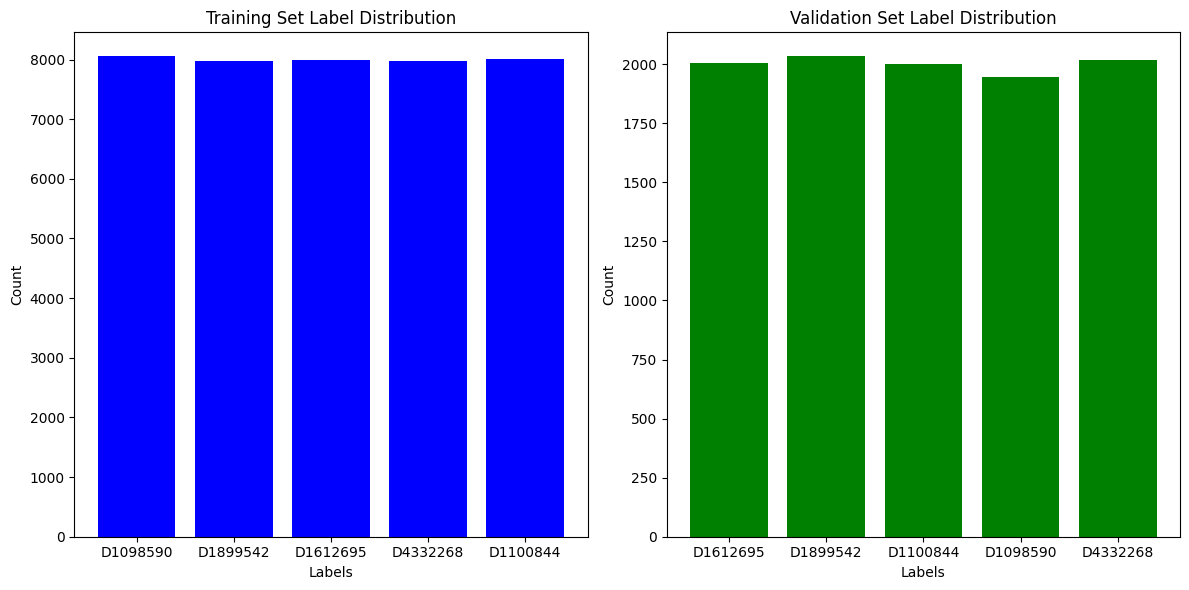

In [14]:
# CHECK FOR COMPONENT DISTRIBUTION IN THE DATASET:

import os
import matplotlib.pyplot as plt

def extract_label(filename):
    # Extracts the label from the filename. Modify this based on your actual label structure.
    return filename.split('_')[0]

# Paths to the training and validation directories
train_dir = '/content/Images/training_XML'
val_dir = '/content/Images/validation_XML'

# Function to count labels in a directory
def count_labels_in_directory(directory):
    labels = [extract_label(f) for f in os.listdir(directory) if f.endswith('.png')]
    label_counts = {}
    for label in labels:
        if label in label_counts:
            label_counts[label] += 1
        else:
            label_counts[label] = 1
    return label_counts

# Count labels in each set
train_counts = count_labels_in_directory(train_dir)
val_counts = count_labels_in_directory(val_dir)

# Create plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.bar(train_counts.keys(), train_counts.values(), color='blue')
ax1.set_title('Training Set Label Distribution')
ax1.set_xlabel('Labels')
ax1.set_ylabel('Count')

ax2.bar(val_counts.keys(), val_counts.values(), color='green')
ax2.set_title('Validation Set Label Distribution')
ax2.set_xlabel('Labels')
ax2.set_ylabel('Count')

# Improve layout and display plot
plt.tight_layout()
plt.show()

# **UPLOAD DATASET:**

### **YOLO:**

In [15]:
import os
import shutil
from google.colab import files

def zip_and_upload_folder(folder_path, drive_path):
    # Zip the folder locally
    shutil.make_archive(folder_path, 'zip', folder_path)

    # Move the zip to Google Drive
    shutil.move(f"{folder_path}.zip", os.path.join(drive_path, f"{os.path.basename(folder_path)}.zip"))

# Folder paths on your local Colab
folder1 = '/content/Images/training'
folder2 = '/content/Images/validation'

# Google Drive path
drive_folder = '/content/gdrive/My Drive/Colab Notebooks/Data/MEDIUM COMPLEXITY/YOLO DATASET'  # Adjust the path as needed

# Zip and upload folders
zip_and_upload_folder(folder1, drive_folder)
zip_and_upload_folder(folder2, drive_folder)

### **XML:**

In [16]:
import os
import shutil
from google.colab import files

def zip_and_upload_folder(folder_path, drive_path):
    # Zip the folder locally
    shutil.make_archive(folder_path, 'zip', folder_path)

    # Move the zip to Google Drive
    shutil.move(f"{folder_path}.zip", os.path.join(drive_path, f"{os.path.basename(folder_path)}.zip"))

# Folder paths on your local Colab
folder1 = '/content/Images/training_XML'
folder2 = '/content/Images/validation_XML'

# Google Drive path
drive_folder = '/content/gdrive/My Drive/Colab Notebooks/Data/MEDIUM COMPLEXITY/XML DATASET'  # Adjust the path as needed

# Zip and upload folders
zip_and_upload_folder(folder1, drive_folder)
zip_and_upload_folder(folder2, drive_folder)